<a href="https://colab.research.google.com/github/AritroGomes/INST414/blob/main/Predicting_USA_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting USA House Prices with Supervised Learning

**Research Question:**  
Can we predict the sale price of a house based on its characteristics?

**Stakeholder:**  
A real estate agent or homebuyer who needs to understand what drives home value.

**Purpose:**  
Accurate price predictions help with buying decisions, pricing homes fairly, and understanding which features increase property value.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/USA Housing Dataset.csv')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


In [5]:
df.isna().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
# Drop duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

df.shape


(4140, 18)

In [9]:
target = 'price'

feature_cols = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement', 'yr_built'
]

X = df[feature_cols]
y = df[target]

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008
1,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007
2,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010
3,3.0,2.25,998,904,2.0,0,0,3,798,200,2007
4,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((3312, 11), (828, 11))

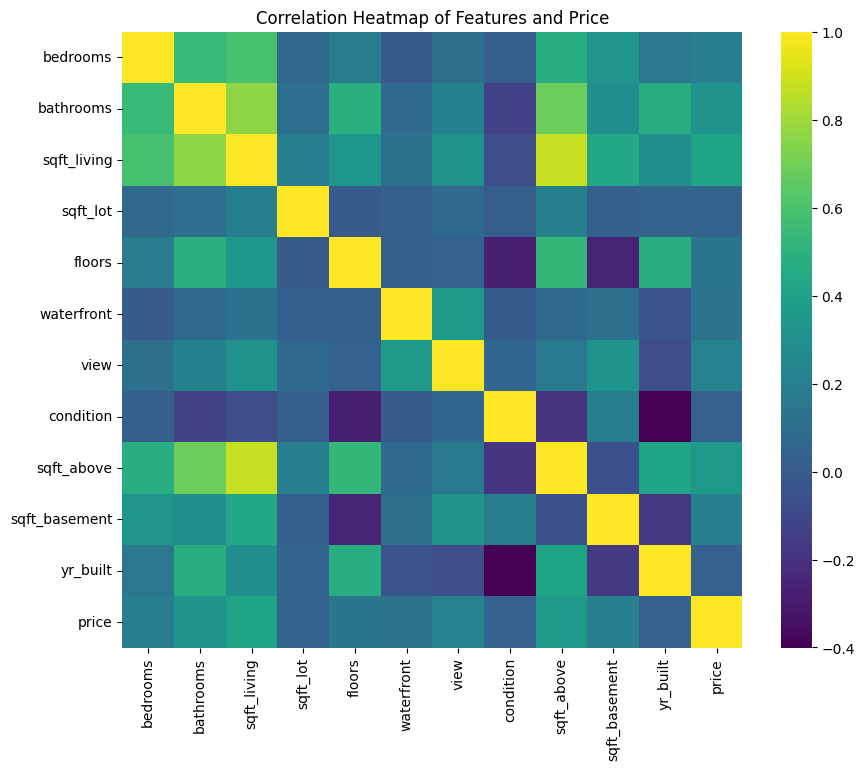

In [11]:
plt.figure(figsize=(10,8))
corr = df[feature_cols + [target]].corr()
sns.heatmap(corr, cmap='viridis', annot=False)
plt.title('Correlation Heatmap of Features and Price')
plt.show()


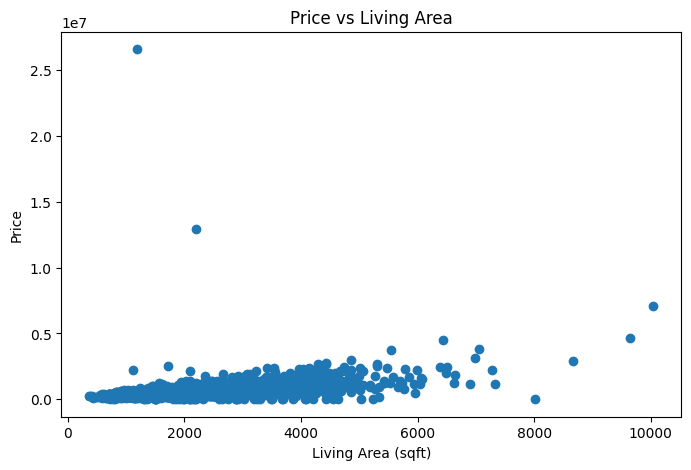

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.show()

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 167423.65268146616
RMSE: 256177.7892144038
R² Score: 0.37399932197575425


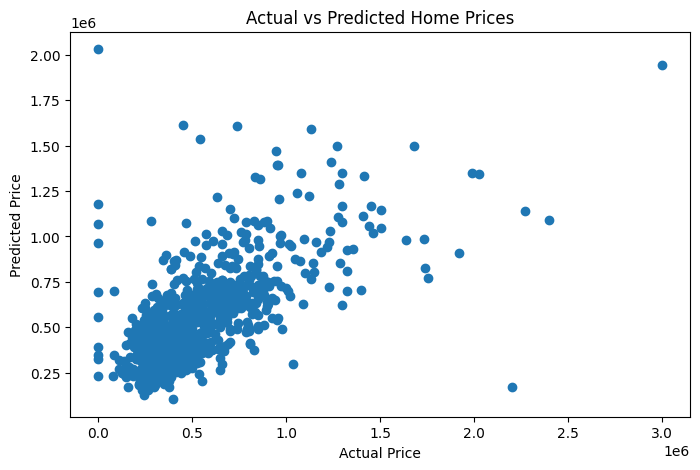

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Home Prices')
plt.show()


In [17]:
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
5,waterfront,417275.816923
1,bathrooms,56415.958923
6,view,35511.603943
7,condition,26397.376452
4,floors,24615.017886
2,sqft_living,181.206801
8,sqft_above,99.602645
9,sqft_basement,81.604156
3,sqft_lot,-0.701109
10,yr_built,-2195.989046


In [18]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results['Error'] = results['Actual'] - results['Predicted']
results['AbsError'] = results['Error'].abs()

# Sort by highest errors
results_sorted = results.sort_values(by='AbsError', ascending=False)

# Show top 10 so you can pick 5
results_sorted.head(10)


,Actual,Predicted,Error,AbsError
689,0.0,2.029940e+06,-2.029940e+06,2.029940e+06
781,2199900.0,1.706852e+05,2.029215e+06,2.029215e+06
494,2400000.0,1.088013e+06,1.311987e+06,1.311987e+06
207,0.0,1.176242e+06,-1.176242e+06,1.176242e+06
365,452500.0,1.611603e+06,-1.159103e+06,1.159103e+06
794,2271150.0,1.139257e+06,1.131893e+06,1.131893e+06
345,0.0,1.065629e+06,-1.065629e+06,1.065629e+06
57,3000000.0,1.943142e+06,1.056858e+06,1.056858e+06
336,1920000.0,9.110154e+05,1.008985e+06,1.008985e+06
704,542500.0,1.535997e+06,-9.934971e+05,9.934971e+05


In [19]:
X_test_reset = X_test.reset_index(drop=True)
error_details = pd.concat([X_test_reset, results_sorted.reset_index(drop=True)], axis=1)
error_details.head(10)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,Actual,Predicted,Error,AbsError
0,5.0,2.25,3000,13899,2.0,0,0,4,3000,0,1975,0.0,2.029940e+06,-2.029940e+06,2.029940e+06
1,2.0,1.00,1220,17172,1.0,0,0,4,1220,0,1947,2199900.0,1.706852e+05,2.029215e+06,2.029215e+06
2,3.0,2.50,2030,2805,2.0,0,0,3,1720,310,2001,2400000.0,1.088013e+06,1.311987e+06,1.311987e+06
3,3.0,2.00,1400,6200,1.0,0,0,3,700,700,1948,0.0,1.176242e+06,-1.176242e+06,1.176242e+06
4,4.0,1.00,1410,6000,1.0,0,0,3,810,600,1925,452500.0,1.611603e+06,-1.159103e+06,1.159103e+06
5,4.0,2.00,1210,11100,1.0,0,0,4,1210,0,1955,2271150.0,1.139257e+06,1.131893e+06,1.131893e+06
6,4.0,2.50,2430,4747,2.0,0,0,3,2430,0,2008,0.0,1.065629e+06,-1.065629e+06,1.065629e+06
7,5.0,1.50,2520,5753,1.5,0,0,4,1510,1010,1928,3000000.0,1.943142e+06,1.056858e+06,1.056858e+06
8,3.0,1.75,1730,8400,1.0,0,0,4,1400,330,1980,1920000.0,9.110154e+05,1.008985e+06,1.008985e+06
9,3.0,1.50,1940,9887,1.0,0,0,4,1140,800,1969,542500.0,1.535997e+06,-9.934971e+05,9.934971e+05
